### Install Required Packages

In [1]:
! pip install numpy pandas scikit-learn wordcloud matplotlib

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud, STOPWORDS

### Read data

In [3]:
df = pd.read_csv('../assist_material/datasets/extracted/datasets2020/datasets/q1/train.csv', sep=',')
df.columns = ['id', 'title', 'content', 'label']

### Generating Word Clouds

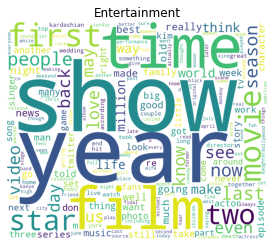

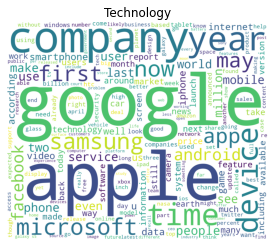

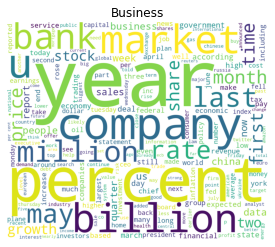

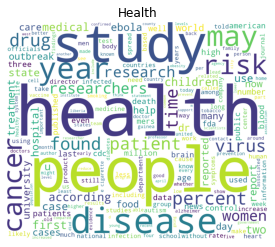

In [4]:
words_per_category = dict()
stop_words = STOPWORDS.update(['will', 's', 't', 'one', 'new', 'said', 'say', 'says'])
word_cloud = WordCloud(stopwords=stop_words, background_color='white', width=1200, height=1000)

for row in df.itertuples(index=False):
    counts_line = word_cloud.process_text(row.content + ' ' + row.title)
    if row.label not in words_per_category:
        words_per_category[row.label] = Counter(counts_line)
    else:
        words_per_category[row.label] += Counter(counts_line)

for category, words_frequencies in words_per_category.items():
    word_cloud_img = word_cloud.generate_from_frequencies(words_frequencies)
    plt.figure()
    plt.imshow(word_cloud_img)
    plt.title(category)
    plt.axis('off')
    plt.draw()
plt.show()